In [48]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# New Section

In [0]:

import numpy as np
import pandas as pd
import os
import keras
from sklearn.datasets import load_files
from keras.utils import np_utils


from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
# from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.models import Sequential,Model
from keras import backend as K
from IPython.display import display

from keras.preprocessing.image import ImageDataGenerator

import glob
import cv2
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [77]:
train=[]

files=(glob.glob("/content/gdrive/My Drive/ham21/*"))
for myFile in files:
    image = cv2.imread (myFile)
    train.append (image)
    
print(np.array(train).shape)

# path="/content/gdrive/My Drive/single_cell_data/"
# #!ls {path}
# data = load_files(path)
# print(data)

(23, 450, 600, 3)


In [0]:
import cv2
train_X=[]

items = os.listdir('/content/gdrive/My Drive/ham21')
print (items)
for each_image in items:
  if each_image.endswith(".jpg"):
   full_path = "/content/gdrive/My Drive/ham21/" + each_image
   #print (full_path)
   image = cv2.imread(full_path)
   train_X.append(image)
   
print(np.array(train_X).shape)


['ISIC_0024306.jpg', 'ISIC_0024307.jpg', 'ISIC_0024308.jpg', 'ISIC_0024309.jpg', 'ISIC_0024310.jpg', 'ISIC_0024311.jpg', 'ISIC_0024312.jpg', 'ISIC_0024313.jpg', 'ISIC_0024314.jpg', 'ISIC_0024315.jpg', 'ISIC_0024324.jpg', 'ISIC_0024316.jpg', 'ISIC_0024317.jpg', 'ISIC_0024318.jpg', 'ISIC_0024319.jpg', 'ISIC_0024320.jpg', 'ISIC_0024321.jpg', 'ISIC_0024323.jpg', 'ISIC_0024325.jpg', 'ISIC_0024322.jpg', 'ISIC_0024326.jpg', 'ISIC_0024328.jpg', 'ISIC_0024327.jpg', '.ipynb_checkpoints']
(23, 450, 600, 3)


In [78]:
label =[]
target =pd.read_csv("/content/gdrive/My Drive/ISIC2018_Task3_Training_GroundTruth.csv",nrows=23,delimiter=",")
nv=target.NV

for i in nv:
  if(i==1.0):
    label.append(1)
  else:
    label.append(0)
    
print((np.array(label)).shape)


(23,)


In [0]:
target_train=target[['MEL','NV','BCC','AKIEC','BKL','DF','VASC']]


In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,

                                                                           shear_range = 0.1, 

                                                                           zoom_range = 0.2, 

                                                                           horizontal_flip = True)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, label, test_size = 0.2)

#change shape from (x,0) to (x,1)
Y_train=np.array(Y_train).reshape(np.array(Y_train).shape[0],1)
Y_test=np.array(Y_test).reshape(np.array(Y_test).shape[0],1)


In [80]:
from keras.utils import np_utils
n_classes=2
y_train=np_utils.to_categorical(Y_train,n_classes)
y_test=np_utils.to_categorical(Y_test,n_classes)
print("Shape after one encoding train label",y_train.shape)
print("Shape after one encoding test label",y_test.shape)

img_rows = X_train[0].shape[0]
img_cols = X_train[0].shape[1]

input_shape=(img_rows,img_cols,3)

print(input_shape)

Shape after one encoding train label (18, 2)
Shape after one encoding test label (5, 2)
(450, 600, 3)


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Dense , Dropout,Activation
from keras import layers, optimizers

In [0]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(input_shape)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(264))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

#print(model.summary())

In [0]:
model.compile( optimizer='adam',loss='binary_crossentropy',
                metrics=['accuracy'])

In [84]:
history=model.fit(np.array(X_train),np.array(y_train),
                 batch_size=20,epochs=100,
                 verbose=1,
                 validation_data=(np.array(X_test),np.array(y_test)))


Train on 18 samples, validate on 5 samples
Epoch 1/100
18/18 [==============================] - 3s 170ms/step - loss: 6.2242 - acc: 0.6111 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/100
18/18 [==============================] - 0s 22ms/step - loss: 9.7670 - acc: 0.3889 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/100
18/18 [==============================] - 0s 21ms/step - loss: 9.7719 - acc: 0.3889 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/100
18/18 [==============================] - 0s 21ms/step - loss: 8.8764 - acc: 0.4444 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/100
18/18 [==============================] - 0s 21ms/step - loss: 7.9907 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 6/100
18/18 [==============================] - 0s 21ms/step - loss: 9.7621 - acc: 0.3889 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/100
18/18 [==============================] - 0s 21ms/step - loss: 9.3144 - acc: 0.4167 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 8/100
18/18 [=============

In [0]:
model.save("skin1.h5")

In [85]:
scores=model.evaluate(np.array(X_train),np.array(y_train),verbose=1)
print("Test loss",scores[0])
print("test accuracy",scores[1])

18/18 [==============================] - 0s 9ms/step
Test loss 11.577396392822266
test accuracy 0.2777777910232544


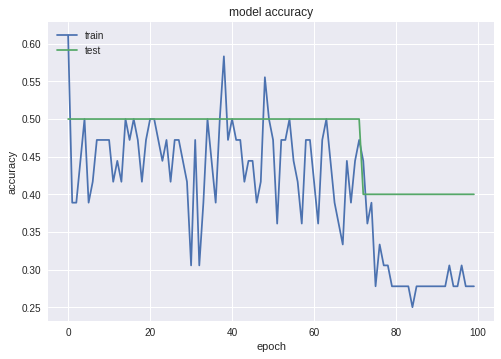

In [86]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Accuracy Curves')

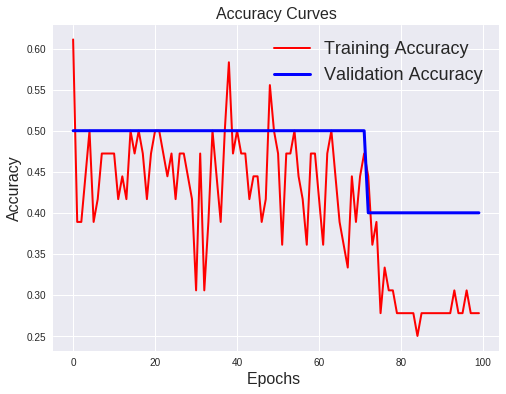

In [87]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=2.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)